In [120]:
import gym
import os
from gym.envs.registration import register
import yaml
import numpy as np
import matplotlib.pyplot as plt
registered = False

In [121]:
if not registered:

    with open('../domains_conf/heavenhell.yaml') as file:
        env_conf = yaml.load(file, Loader=yaml.FullLoader)
        print(env_conf)

    register(
        id=env_conf['name'],
        entry_point=env_conf['entry_point'],
        kwargs=env_conf['config'],
        max_episode_steps=env_conf['max_episode_steps']
    )
    
    registered = True

{'name': 'HeavenHell-v0', 'entry_point': 'domains.heaven_hell:HeavenHellEnv', 'config': None, 'max_episode_steps': 100}


Error: Cannot re-register id: HeavenHell-v0

In [122]:
env = gym.make(env_conf['name'])
obss_by_episode = []
rewards_by_episode = []
steps = 0
for i in range(1000):
    env.reset()
    done = False
    rewards = []
    obss = []
    while not done:
        next_obs, reward, done, _ = env.step(env.action_space.sample())
        steps += 1
        rewards.append(reward)
        obss.append(int(next_obs))
    rewards_by_episode.append(rewards)
    obss_by_episode.append(obss)

In [123]:
count = 0
lengths = []
for rewards, obss in zip(rewards_by_episode, obss_by_episode):
    if rewards[-1] == 1.0 and (9 in obss or 10 in obss):
        count += 1
        if 9 in obss:
            lengths.append(len(rewards) - obss.index(9))
        elif 10 in obss:
            lengths.append(len(rewards) - obss.index(10))
print(count)

159


In [128]:
np.sum(np.bincount(lengths)[:25])

28

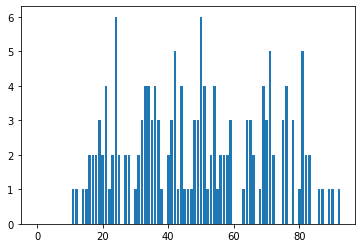

In [129]:
plt.bar(np.arange(np.max(lengths)+1), np.bincount(lengths))
plt.show()